<a href="https://colab.research.google.com/github/tacerihsehc613/ML-board/blob/main/K_Means_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-image
!pip install tqdm

In [ ]:
# import stuff that we need
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import skimage
import skimage.io as skio
import tqdm as tq
from tqdm import tqdm_notebook as tqdm

!pip install numpy==1.19.4
!pip install matplotlib==3.3.3
!pip install scikit-image==0.18.1
!pip install tqdm==4.56.0

In [ ]:
assert np.__version__ == "1.19.4", "Looks like you don't have the same version of numpy as us!"
assert mpl.__version__ == "3.3.3", "Looks like you don't have the same version of matplotlib as us!"
assert skimage.__version__ == "0.18.1", "Looks like you don't have the same version of skimage as us!"
assert tq.__version__ == "4.56.0", "Looks like you don't have the same version of tqdm as us!"

In [ ]:
# The wget command downloads the image we will work with today.
# If it does not work, you can download it manually (make sure it is in the right folder) and
# rename it as "talos.jpg" without the quotes.
!wget -nc https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Vaso_di_Talos_particolare.JPG/1920px-Vaso_di_Talos_particolare.JPG
!mv 1920px-Vaso_di_Talos_particolare.JPG talos.jpgb

--2022-03-18 12:16:05--  https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Vaso_di_Talos_particolare.JPG/1920px-Vaso_di_Talos_particolare.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 398515 (389K) [image/jpeg]
Saving to: ‘1920px-Vaso_di_Talos_particolare.JPG’

1920px-Vaso_di_Talo 100%[===================>] 389.17K  --.-KB/s    in 0.02s   

2022-03-18 12:16:05 (15.8 MB/s) - ‘1920px-Vaso_di_Talos_particolare.JPG’ saved [398515/398515]



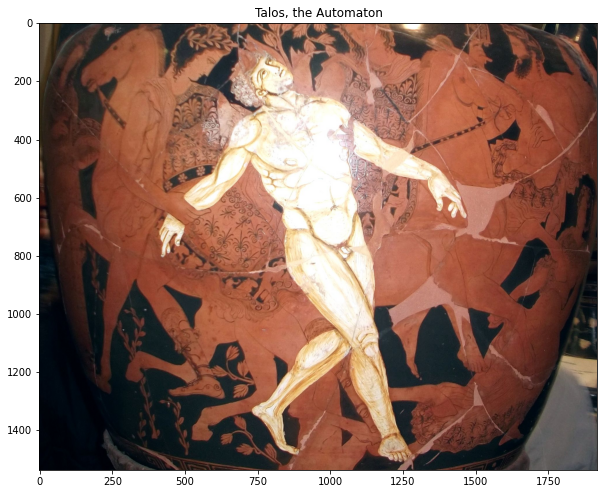

In [ ]:
# Loading the image
# Documentation: https://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imread
# [CODE HERE] Load the image in a variable called "image"

# load and display an image with Matplotlib
from matplotlib import image

image = image.imread('talos.jpgb')
image=image.reshape(-1,1920*3)

#from sklearn.preprocessing import StandardScaler
#ss = StandardScaler()
#ss.fit(image)
#image=ss.transform(image)
#print(image[0])
#print(len(image[0]))

# Standardization of the image (values go from the range 0-255 to 0-1)
# Documentation: https://scikit-image.org/docs/dev/api/skimage.html#skimage.img_as_float32
# [CODE HERE] Standardise the image
#from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler객체 생성
#scaler = MinMaxScaler(feature_range=(0, 1))
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
#scaler.fit(image)
#image = scaler.transform(image)
# sklearn MinMaxScaler()  out-of-range value 에러 발생

image= (image - np.min(image)) / (np.max(image) - np.min(image))

image=image.reshape(-1,1920,3)

# [/CODE HERE]

assert image.max() - 1.0 < 1e-7, "The image must be standardized."

# Plotting the image
plt.figure(figsize=(10, 10))
plt.title("Talos, the Automaton")
plt.imshow(image)
plt.show()

In [ ]:
print(f"Image width   : {image.shape[0]}")
print(f"Image height  : {image.shape[1]}")
print(f"Image channels: {image.shape[2]}")
print(f"Image size    : {np.prod(image.shape)}")

Image width   : 1537
Image height  : 1920
Image channels: 3
Image size    : 8853120


In [ ]:
from math import pi
# This steps reshape the image in the format (N, D) for N points in D dimensions.
# D will always be 3 since we will only deal with RGB images today.
pixels = image.reshape(-1, 3)
print("Pixels array shape                   :", pixels.shape)

# There are 2 951 040 pixels in 3 dimensions, which is A LOT!
# If you have too much data, algorithms will be slow, and displaying the data can take forever (literally).
# So let's keep 0.1% of them (in other words randomly discard 99.9%)
# Documentation: https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.rand.html

# [CODE HERE] Create a variable "keep" of size pixels.shape[0] that contains a random binary mask with 0.1% of True's.
#             Make sure it is a numpy array
k_size=int(0.001*len(pixels))
choice = np.random.choice(range(pixels.shape[0]), size=k_size, replace=False)
#print(choice.shape)
keep = np.zeros(pixels.shape[0], dtype=bool)
keep[choice] = True
# [/CODE HERE]
assert keep.dtype == bool, "keep must be containing booleans"
assert len(keep) == pixels.shape[0], "keep has the wrong shape, it should be pixels.shape[0]"
assert (np.unique(keep) == [False, True]).all(), "keep must only contain True/False values"

# Now the smaller dataset is named pixels_small
pixels_small = pixels[keep]
print("Pixels array shape (after discarding):", pixels_small.shape)
print(f"Reduction in size                    : {1-pixels_small.shape[0]/pixels.shape[0]:.1%}")
print(pixels.mean(axis=0))
print(type(pixels.mean(axis=0)))
print(pixels.mean(axis=0).shape)

Pixels array shape                   : (2951040, 3)
Pixels array shape (after discarding): (2951, 3)
Reduction in size                    : 99.9%
[0.51639043 0.36138572 0.30276146]
<class 'numpy.ndarray'>
(3,)


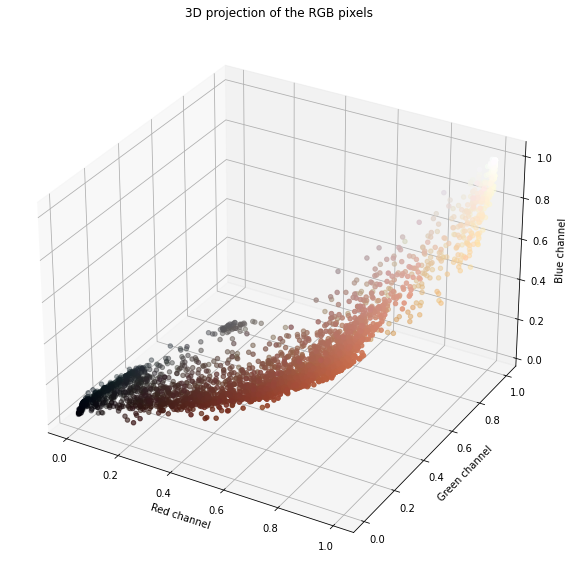

In [ ]:
"""
Now that we have the image collapsed in a list of pixels, it is possible
to display each individual pixel in 3D, just by connecting the RGB intensities
to the axis X, Y, Z.
"""
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(*pixels_small.T, c=pixels_small)
ax.set_xlabel("Red channel")
ax.set_ylabel("Green channel")
ax.set_zlabel("Blue channel")
plt.title("3D projection of the RGB pixels")
plt.show()

In [ ]:
from scipy.spatial import distance
def euclidean_dist(a, b):
    """Computes the euclidean distance between two sets of D-dimensional points.
    
    Args:
        a (array): A list of points of shape (N, D).
        b (array): A list of points of shape (M, D).
    
    Returns:
        (array): An array of shape (N, M) containing all the pairwise distances between each point of a and b.
    """
    # If a or b are python lists, they are transformed into numpy arrays.
    if isinstance(a, list): a = np.array(a)
    if isinstance(b, list): b = np.array(b)
    assert a.ndim == 2 and b.ndim == 2, "a and b must be 2-dimensional arrays."
    assert a.shape[1] == b.shape[1], "a and b must have the same dimension D."
    
    N = a.shape[0]
    M = b.shape[0]
    D = a.shape[1]
    distances = np.ones((N, M))
    
    # [CODE HERE] Fill in the matrix "distances" so that it contains the pairwise distances between the point set a and b.
    # Advice: try using only two nested for-loops, for speed's sake.

    # [/CODE HERE]
    for i in range(0,N):
      for j in range(0,M):
        distances[i][j]=distance.euclidean(a[i], b[j])

    return distances

In [ ]:
# Testing the euclidean distance
assert euclidean_dist([[0]], [[1]]) == 1, "Unit test 1 failed."
assert euclidean_dist([[0, 0, 0]], [[1, 1, 1]]) == np.sqrt(3), "Unit test 2 failed."
np.random.seed(0)
random_array1 = np.random.rand(10, 4)
random_array2 = np.random.rand(10, 4)
assert np.abs(euclidean_dist(random_array1, random_array2).mean() - 0.8897) < 1e-4, "Unit test 3 failed."

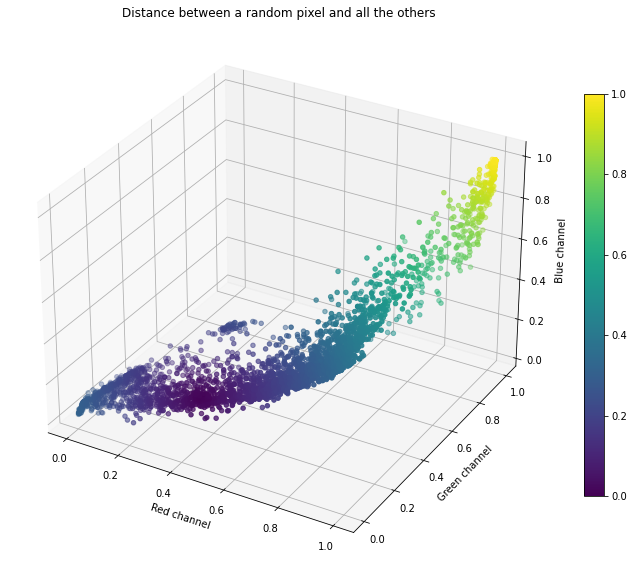

In [ ]:
# We will test the euclidean function by picking a random pixel
# and checking its distance with all the other pixels in the image.
# you can choose to modify "random_pixel" to a specific pixel or
# position in the 3D space.
N = pixels_small.shape[0]
random_index = np.random.randint(N)
random_pixel = np.array([pixels_small[random_index]])

# Computing all the distances
distances = euclidean_dist(random_pixel, pixels_small)[0]
# The distances are normalised to be between 0 and 1.
distances /= distances.max()
import mpl_toolkits.mplot3d.art3d as art3d

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")
p = ax.scatter(*pixels_small.T, c=distances)
fig.colorbar(p, fraction=0.03)
ax.set_xlabel("Red channel")
ax.set_ylabel("Green channel")
ax.set_zlabel("Blue channel")
plt.title("Distance between a random pixel and all the others")
plt.show()

In [ ]:
from numpy.core.arrayprint import DatetimeFormat
# The following part needs to be implemented by you.
class KMeans:
  """ K-Means Algorithm. """

  def __init__(self, K, D):
    """Initialisation of the KMeans algorithm.
    Args:
    K (int): The number of clusters to use.
    D (int): The number of dimensions
    """
    self.K = K
    self.D = D
    # Initialise the clusters to zero
    self.clusters = np.zeros((K, D))
    
  def fit(self, data, iterations=5):
    """Trains the algorithm and iteratively refines the clusters' positions.
        
    Args:
      data (array): The data points to cluster, shape must be (N, D)
      iterations (int): The number of iterations of the K-means algorithm.
        
    Note:
      The algorithm updates the member variable "clusters".
    """
    assert data.ndim == 2 and data.shape[1] == self.D, "The data should have the shape (N, D)."
    assert iterations > 0, "The number of iterations should be positive."
    # Starting the algorithm
    N = data.shape[0] # Number of points in the data

    # [CODE HERE] Update the clusters in function of the data

    # 1. Pick K random points from the data and use them as starting position for the clusters.
    self.clusters = data[np.random.choice(len(data), size=self.K, replace=False)] 
    iter_num=0
    while(iter_num <iterations):
      iter_num+=1
      # 2. Compute the distances between the data and the clusters
      distances=euclidean_dist(data,self.clusters)
      # 3. Associate each data point to the nearest cluster
      fitting=[]
      for i in range(0,len(distances)):
        #np.argmin(distances[i])
        fitting.append(self.clusters[np.argmin(distances[i])])

      # 4. For each cluster
      clusters_unique=np.unique(fitting)
      
      for i in range(0,len(clusters_unique)):
        # 5. Gather all the points in the cluster
        idx = np.where(np.all(fitting==clusters_unique[i],axis=1))[0]
        # 6. Compute the mean value of the cluster
        mean_value=data[idx].mean(axis=0)
        
        # 7. Update of the position of the cluster
        idx = np.where(np.all(self.clusters==clusters_unique[i],axis=1))[0]
        self.clusters[idx] = mean_value     


  def predict(self, data):
    """Predicts the cluster id for each of the
        
    Args:
      data (array): The data points to cluster, shape must be (N, D)
        
    Returns:
      (list of int): The id of the cluster of each of the data points, shape is N.
    """
    assert data.ndim == 2 and data.shape[1] == self.D, "The data should have the shape (N, D)."
        
    # [CODE HERE] Update the clusters in function of the data
    # 1. Compute the distances between data and the clusters.

    distances=euclidean_dist(data,self.clusters)
    # 2. The datapoints are associated to each clusters.
    clustered_points=[]
    for i in range(0,len(distances)):
    #np.argmin(distances[i])
      clustered_points.append(np.argmin(distances[i]))
    # [/CODE HERE]

    return np.array(clustered_points)

In [ ]:
# Choose a number of clusters
K = 16
kmeans = KMeans(K=K, D=3)
kmeans.fit(pixels_small, iterations=30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


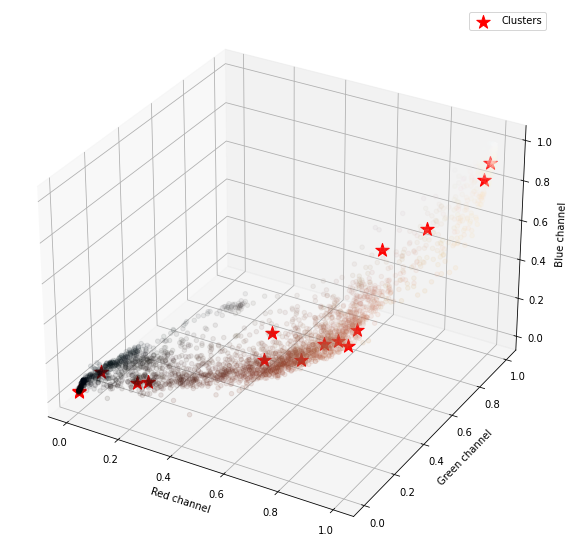

In [ ]:
"""
Again, we show the 3D projection of the RGB pixels, along with the position of the learnt clusters.
"""
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(*pixels_small.T, color=pixels_small, alpha=0.1)
ax.scatter(*kmeans.clusters.T, s=200, color="red", marker="*", depthshade=False, label="Clusters")
ax.set_xlabel("Red channel")
ax.set_ylabel("Green channel")
ax.set_zlabel("Blue channel")
plt.legend()
plt.show()

In [ ]:
# We take the original image (we dropped a lot of pixels in the beginning, remember?), as
# we will compress the full sized image.
# We already trained the kmeans algorithm by calling fit before.
# Each of the pixels of the big image is associated to a specific cluster.
clustered_image = kmeans.predict(pixels)
print(clustered_image)
# We now need to determine which color is given to each cluster. In this case
# we will take the mean.
# Constructing the palette
palette = np.empty((kmeans.K, kmeans.D))
# For each cluster
for i in range(kmeans.K):
    # We take the pixels belonging to the ith cluster.
    idx=np.where(clustered_image == i)[0]
    cluster = pixels[idx]
    #cluster = pixels[clustered_image == i]
    # We compute the average color for the cluster
    color = cluster.mean(axis=0)
    # The ith color of the palette is set.
    palette[i] = color

[ 1  1  1 ... 11 11 11]


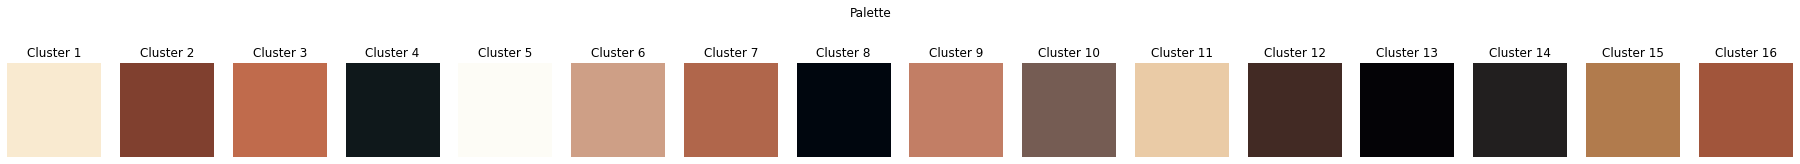

In [ ]:
fig, ax = plt.subplots(1, kmeans.K, figsize=(2*kmeans.K, 3))
fig.suptitle("Palette")
for i in range(kmeans.K):
    ax[i].set_title(f"Cluster {i+1}")
    ax[i].imshow(palette[i].reshape(1, 1, kmeans.D), interpolation="None")
    ax[i].axis("off")
plt.show()

In [ ]:
def cluster2image(image, palette, imshape):
    """Constructs an RGB image from the clustered pixels and a palette.
    
    Args:
        image (list of int): a list of clustered pixels, shape (N).
        palette (array): a list of K different colors.
        imshape: the 2D shape of the image to create.
    """
    assert image.ndim == 1, "The image must have only one dimension."
    assert palette.ndim == 2, "The palette must have two dimensions."
    assert isinstance(imshape, tuple), "imshape must be a tuple."

    N = image.shape[0]
    K, D = palette.shape

    final_image = np.empty((N, D))
    for i in range(K):
        cluster = image == i
        for j in range(D):
            final_image[cluster, j] = palette[i, j]
    
    return final_image.reshape(imshape)


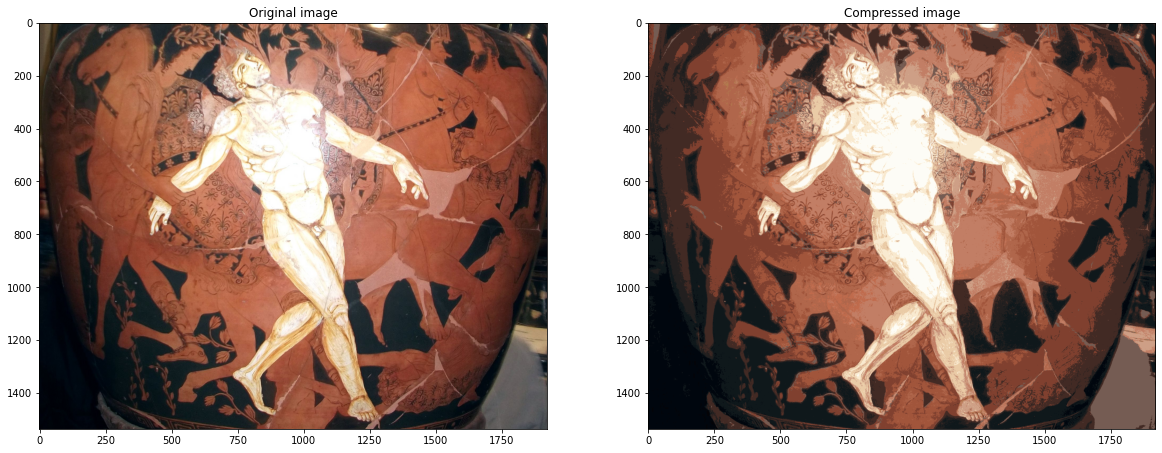

In [ ]:
final_image = cluster2image(clustered_image, palette, image.shape)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_title("Original image")
ax[0].imshow(image)
ax[1].set_title("Compressed image")
ax[1].imshow(final_image)
plt.show()